/tmp/ipykernel_1304/368692234.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


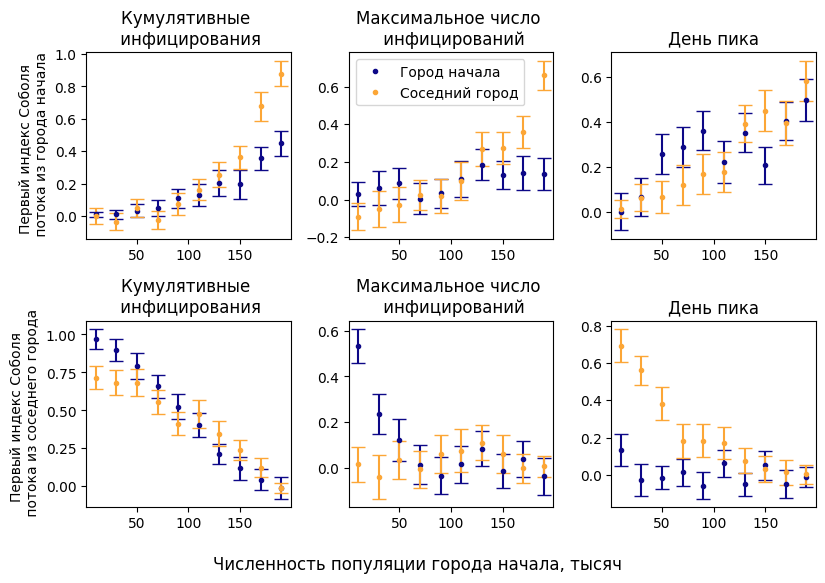

In [1]:
import numpy as np
from SALib.analyze import sobol
import pickle
import matplotlib.pyplot as plt

population = 2e5
max_sizes = np.arange(1e4, population, 2e4)
captions = ['Кумулятивные \n инфицирования',
            'Максимальное число \n инфицирований',
            'День пика']
inds = [0,2,4]

colors = plt.cm.plasma(np.linspace(0, 0.8, 2))

with open('pkls/problem.pkl', 'rb') as file:
    problem = pickle.load(file)


A4_WIDTH = 8.27  # Ширина A4
A4_HEIGHT = 11.69/2  # Высота A4 (можно уменьшить, если нужно)
fig, ax = plt.subplots(2, 3, figsize=(A4_WIDTH, A4_HEIGHT))

index = 'S1'
for i in range(2):
    for k, caption in enumerate(captions):
        for big_size in max_sizes:
            data = np.load(f'pkls/bignsmall_{int(big_size)}.npy') 

            indices = sobol.analyze(problem, data[:,inds[k]], calc_second_order=False)
            ax[i][k].errorbar(x=big_size//10**3, y=indices[index][i], yerr=indices[f'{index}_conf'][i], color=colors[0], capsize=5, fmt='.')

            indices = sobol.analyze(problem, data[:,inds[k]+5], calc_second_order=False)
            ax[i][k].errorbar(x=big_size//10**3, y=indices[index][i], yerr=indices[f'{index}_conf'][i], color=colors[1], capsize=5, fmt='.')

            ax[i][k].set_title(f'{caption}')

        ax[i][k].errorbar([],[], color=colors[0], capsize=5, fmt='.', label='Город начала')
        ax[i][k].errorbar([],[], color=colors[1], capsize=5, fmt='.', label='Соседний город')

        # ax[i][k].legend()
ax[0][1].legend()
ax[0][0].set_ylabel('Первый индекс Соболя \n потока из города начала')
ax[1][0].set_ylabel('Первый индекс Соболя \n потока из соседнего города')
# ax[1][0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
#           fancybox=True, shadow=True)
fig.supxlabel('Численность популяции города начала, тысяч')
plt.tight_layout()

fig.show()
plt.savefig('graphs/bignsmall_bars.pdf')

In [2]:
data.shape

(4096, 10)

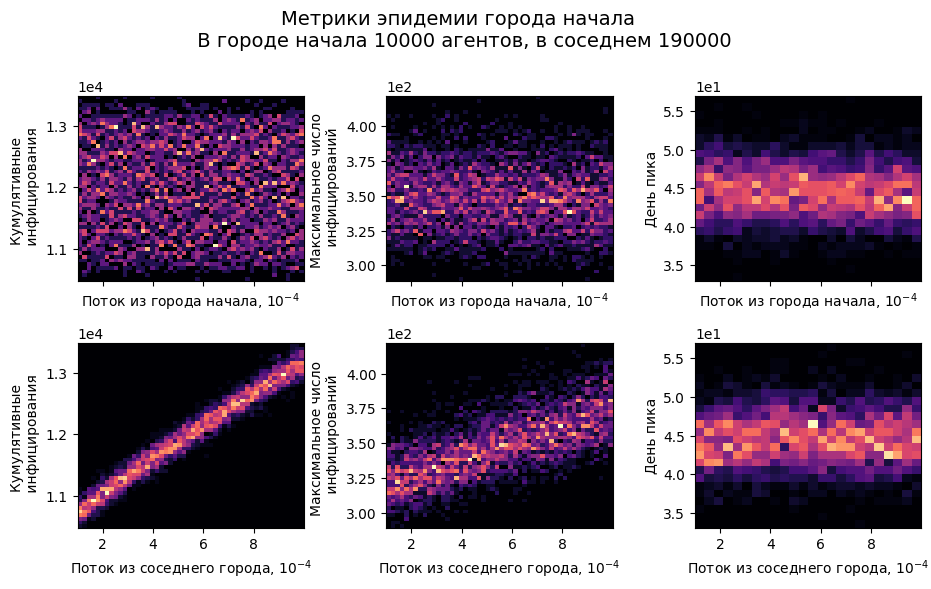

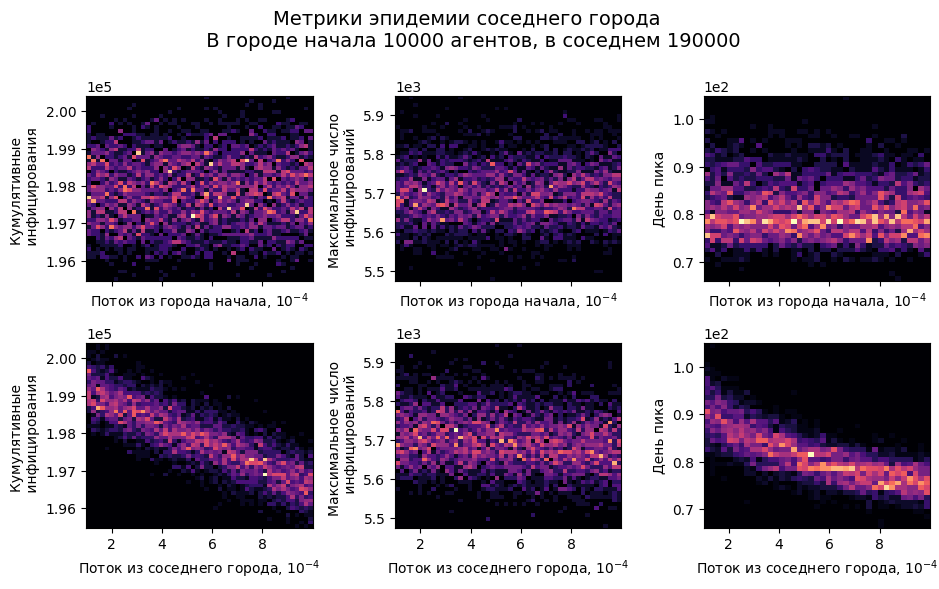

In [8]:
import scipy.stats as sps

big_size = 1e4

captions = ['Кумулятивные \n инфицирования',
            'Максимальное число \n инфицирований',
            'День пика']
inds = [0,2,4]
flows = [r'Поток из города начала, $10^{-4}$', r'Поток из соседнего города, $10^{-4}$']

for k, city in enumerate(['города начала', 'соседнего города']):
    A4_WIDTH = 9.5  # Ширина A4
    A4_HEIGHT = 11.69/2  # Высота A4 (можно уменьшить, если нужно)

    parameters = np.load('pkls/parameters.npy', allow_pickle=True)

    fig, ax = plt.subplots(2, len(captions), figsize=(A4_WIDTH, A4_HEIGHT), sharex=True, constrained_layout=True)

    for i in [0, 1]:
        for j, caption in enumerate(captions):
            data = np.load(f'pkls/bignsmall_{int(big_size)}.npy')
            nbins = [[50, 50, int(np.max(data, axis=0)[4] - np.min(data, axis=0)[4])],
                    [50, 50, int(np.max(data, axis=0)[9] - np.min(data, axis=0)[9])]]
            
            ax[i][j].hist2d(parameters[:,i]*1e4, data[:,inds[j]+k*5], bins=nbins[k][j], cmap='magma')

            ax[i][j].set_ylabel(caption)
            ax[i][j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            ax[i][j].set_xlabel(flows[i])

            # slope, intercept, r, p, se = sps.linregress(parameters[:,i], data[:,inds[j]+k*5])
            # x = np.linspace(1e-4, 1e-3, 100)
            # ax[i][j].plot(x*1e4, intercept + slope * x, color='white')
            # print(flows[i], caption, r**2, p)

            # ax[i][j].set_xticks([])
            # ax[i][j].set_yticks([])


    fig.suptitle(f'Метрики эпидемии {city} \n В городе начала {int(big_size)} агентов, в соседнем {int(2e5-big_size)}', fontsize=14, y=1.00)
    fig.tight_layout()
    plt.savefig(f'graphs/bignsmall_{int(big_size)}_{k}.pdf')
    # plt.subplots_adjust(right=0.95)

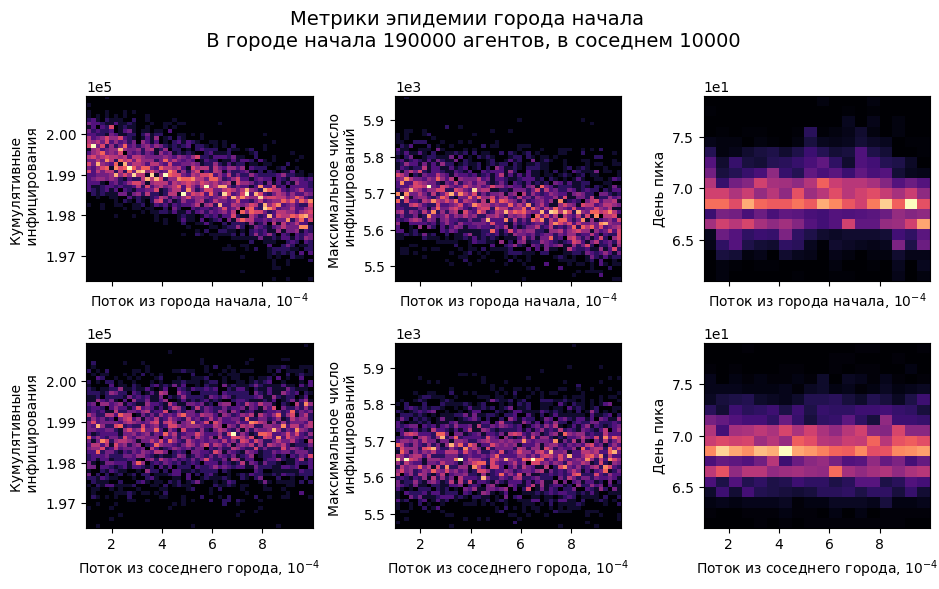

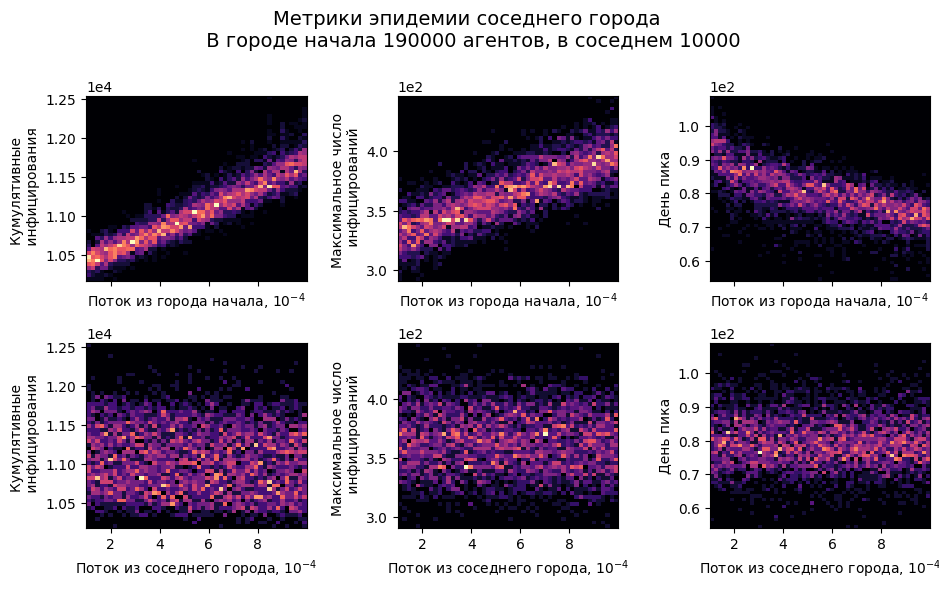

In [143]:
big_size = 19e4

captions = ['Кумулятивные \n инфицирования',
            'Максимальное число \n инфицирований',
            'День пика']
inds = [0,2,4]
flows = [r'Поток из города начала, $10^{-4}$', r'Поток из соседнего города, $10^{-4}$']

for k, city in enumerate(['города начала', 'соседнего города']):
    A4_WIDTH = 9.5  # Ширина A4
    A4_HEIGHT = 11.69/2  # Высота A4 (можно уменьшить, если нужно)

    parameters = np.load('pkls/parameters.npy', allow_pickle=True)

    fig, ax = plt.subplots(2, len(captions), figsize=(A4_WIDTH, A4_HEIGHT), sharex=True, constrained_layout=True)

    for i in [0, 1]:
        for j, caption in enumerate(captions):
            data = np.load(f'pkls/bignsmall_{int(big_size)}.npy')
            nbins = [[50, 50, int(np.max(data, axis=0)[4] - np.min(data, axis=0)[4])],
                    [50, 50, int(np.max(data, axis=0)[9] - np.min(data, axis=0)[9])]]
            
            ax[i][j].hist2d(parameters[:,i]*1e4, data[:,inds[j]+k*5], bins=nbins[k][j], cmap='magma')

            ax[i][j].set_ylabel(caption)
            ax[i][j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            ax[i][j].set_xlabel(flows[i])
            # ax[i][j].set_xticks([])
            # ax[i][j].set_yticks([])


    fig.suptitle(f'Метрики эпидемии {city} \n В городе начала {int(big_size)} агентов, в соседнем {int(2e5-big_size)}', fontsize=14, y=1.00)
    fig.tight_layout()
    plt.savefig(f'graphs/bignsmall_{int(big_size)}_{k}.pdf')
    # plt.subplots_adjust(right=0.95)



начала Кумулятивные 
 инфицирования 0 0.44945085215711755 0.08573209456891956
соседний Кумулятивные 
 инфицирования 0 0.8786295911481152 0.0790063604126315
начала Максимальное число 
 инфицирований 0 0.13536173575145388 0.10345460039626227
соседний Максимальное число 
 инфицирований 0 0.6596325246222873 0.07488752123233706
начала День пика 0 0.4985620308011574 0.08259248514811122
соседний День пика 0 0.58205602952768 0.0845888631289501
начала Кумулятивные 
 инфицирования 1 -0.01022021165612741 0.06917824147395353
соседний Кумулятивные 
 инфицирования 1 -0.009645925735891542 0.024646492861855305
начала Максимальное число 
 инфицирований 1 -0.03848776150442029 0.08113461428889084
соседний Максимальное число 
 инфицирований 1 0.005869143020627873 0.05301910952572888
начала День пика 1 -0.011520023306748324 0.055400996756035006
соседний День пика 1 0.001474899715038071 0.051435043518247806


/tmp/ipykernel_1304/2925429037.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


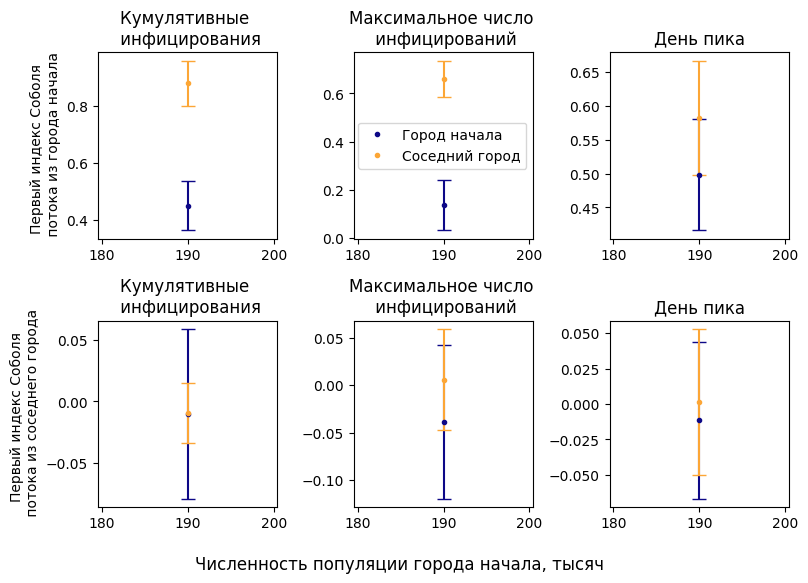

In [11]:
import numpy as np
from SALib.analyze import sobol
import pickle
import matplotlib.pyplot as plt

population = 2e5
max_sizes = np.arange(1e4, population, 2e4)
captions = ['Кумулятивные \n инфицирования',
            'Максимальное число \n инфицирований',
            'День пика']
inds = [0,2,4]

colors = plt.cm.plasma(np.linspace(0, 0.8, 2))

with open('pkls/problem.pkl', 'rb') as file:
    problem = pickle.load(file)


A4_WIDTH = 8.27  # Ширина A4
A4_HEIGHT = 11.69/2  # Высота A4 (можно уменьшить, если нужно)
fig, ax = plt.subplots(2, 3, figsize=(A4_WIDTH, A4_HEIGHT))

index = 'S1'
for i in range(2):
    for k, caption in enumerate(captions):
        for big_size in [190000]:
            data = np.load(f'pkls/bignsmall_{int(big_size)}.npy') 

            indices = sobol.analyze(problem, data[:,inds[k]], calc_second_order=False)
            ax[i][k].errorbar(x=big_size//10**3, y=indices[index][i], yerr=indices[f'{index}_conf'][i], color=colors[0], capsize=5, fmt='.')
            print('начала', caption, i, indices[index][i], indices[f'{index}_conf'][i])

            indices = sobol.analyze(problem, data[:,inds[k]+5], calc_second_order=False)
            ax[i][k].errorbar(x=big_size//10**3, y=indices[index][i], yerr=indices[f'{index}_conf'][i], color=colors[1], capsize=5, fmt='.')
            print('соседний', caption, i, indices[index][i], indices[f'{index}_conf'][i])

            ax[i][k].set_title(f'{caption}')

        ax[i][k].errorbar([],[], color=colors[0], capsize=5, fmt='.', label='Город начала')
        ax[i][k].errorbar([],[], color=colors[1], capsize=5, fmt='.', label='Соседний город')

        # ax[i][k].legend()
ax[0][1].legend()
ax[0][0].set_ylabel('Первый индекс Соболя \n потока из города начала')
ax[1][0].set_ylabel('Первый индекс Соболя \n потока из соседнего города')
# ax[1][0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
#           fancybox=True, shadow=True)
fig.supxlabel('Численность популяции города начала, тысяч')
plt.tight_layout()

fig.show()
# plt.savefig('graphs/bignsmall_bars.pdf')